<h2>Importing the required packages</h2>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import warnings

<h3>Reading the data</h3>

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/IBM-EPBL/IBM-Project-8500-1658921071/main/Final%20Deliverables/Water-dataset.csv",encoding= 'ISO-8859-1',low_memory=False)

In [3]:
data.head(10)

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30,5.5,7.4,81,1.5,0.1,2853,4049,2014
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.2,6.1,6.7,308,1.4,0.3,3355,5672,2014
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.6,6.4,6.7,414,1,0.2,6073,9423,2014
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30,6.4,7.6,305,2.2,0.1,3478,4990,2014
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.1,6.3,7.6,77,2.3,0.1,2606,4301,2014


<h3>Data description</h3>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [5]:
data.shape

(1991, 12)

In [6]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [7]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [8]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [9]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

<h3>Handling null values</h3>

In [10]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [11]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [12]:
data.drop(['FECAL COLIFORM (MPN/100ml)'],axis=1,inplace=True)

In [13]:
data.rename(columns={'D.O. (mg/l)':'DO','CONDUCTIVITY (µmhos/cm)':'CONDUCTIVITY','B.O.D. (mg/l)':'BOD','NITRATENAN N+ NITRITENANN (mg/l)':'NITRATENAN','TOTAL COLIFORM (MPN/100ml)Mean':'TOTAL_COLIFORM'},inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATION CODE    1991 non-null   object 
 1   LOCATIONS       1991 non-null   object 
 2   STATE           1991 non-null   object 
 3   Temp            1991 non-null   float64
 4   DO              1991 non-null   float64
 5   PH              1991 non-null   float64
 6   CONDUCTIVITY    1991 non-null   float64
 7   BOD             1991 non-null   float64
 8   NITRATENAN      1991 non-null   float64
 9   TOTAL_COLIFORM  1991 non-null   float64
 10  year            1991 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 171.2+ KB


<h3>Data Visualization</h3>

<AxesSubplot:>

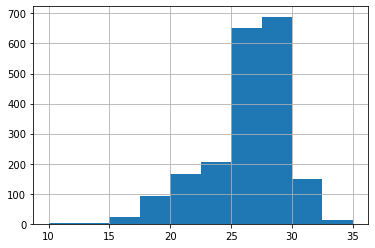

In [16]:
data.Temp.hist()

<AxesSubplot:>

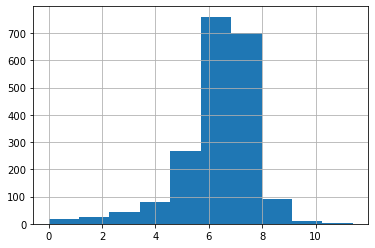

In [18]:
data.DO.hist()

<AxesSubplot:>

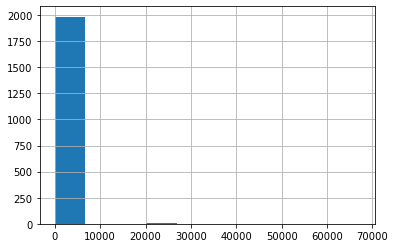

In [20]:
data.PH.hist()

<AxesSubplot:>

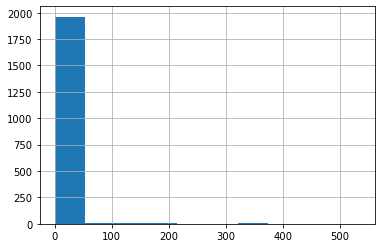

In [22]:
data.BOD.hist()

<AxesSubplot:>

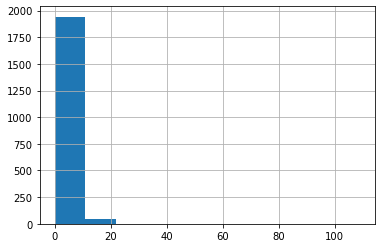

In [23]:
data.NITRATENAN.hist()

<AxesSubplot:>

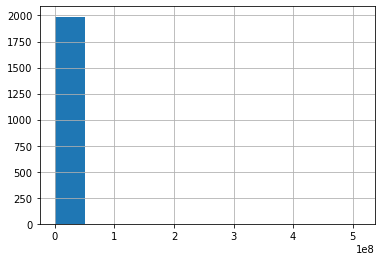

In [24]:
data.TOTAL_COLIFORM.hist()

<h3>Data Preprocessing</h3>

In [15]:
data['ndo']=data.DO.apply(lambda
x:(100 if (x>=6)
else(80 if (6>=x>=5.1)
else (60 if (5>=x>=4.1)
else (40 if (4>=x>=3)
else 0)))))

In [16]:
data['npH']=data.PH.apply(lambda x: (100 if (8.5>=x>=7)
else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)
else (60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
else (40 if (9>=x>=8.8) or (6.7>=x>=6.5)
else 0)))))

In [17]:
data['nco']=data.TOTAL_COLIFORM.apply(lambda x: (100 if (5>=x>=0)
else(80 if (50>=x>=5)
else (60 if (500>=x>=50)
else (40 if (10000>=x>=500)
else 0)))))

In [18]:
data['nbdo']=data.BOD.apply(lambda x:(100 if (3>=x>=0)
else(80 if (6>=x>=3) else(60 if (80>=x>=6) else(40 if (125>=x>=80)
else 0)))))



In [19]:
data['nec']=data.CONDUCTIVITY.apply(lambda x: (100 if (75>=x>=0)
else(80 if(150>=x>=75)
else(60 if (225>=x>=150)
else(40 if (300>=x>=225)
else 0)))))


In [20]:
data['nna']=data.NITRATENAN.apply(lambda x: (100 if (20>=x>=0)
else(80 if (50>=x>=20)
else(60 if (100>=x>=50) else(40 if (200>=x>=100) else 0)))))

In [21]:
data['wph']=data.npH * 0.165 
data['wdo']=data.ndo * 0.281 
data[ 'wbdo']=data.nbdo * 0.234 
data[ 'wec']=data.nec* 0.009 
data['wna']=data.nna * 0.028 
data['wco']=data.nco * 0.281 
data[ 'wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATENAN,TOTAL_COLIFORM,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [22]:
average=data.groupby('year')['wqi'].mean()

In [23]:
data.drop(['STATION CODE','LOCATIONS','STATE'],axis=1,inplace=True)

In [24]:
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

In [25]:
x=data[['Temp','DO','PH','CONDUCTIVITY','BOD','NITRATENAN','TOTAL_COLIFORM']]

In [26]:
y=data.wqi

In [27]:
x.head(10)

,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATENAN,TOTAL_COLIFORM
0,30.6,6.7,7.5,203.0,6.940049,0.1,27.0
1,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0
2,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0
3,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0
4,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0
5,30.0,5.5,7.4,81.0,1.500000,0.1,4049.0
6,29.2,6.1,6.7,308.0,1.400000,0.3,5672.0
7,29.6,6.4,6.7,414.0,1.000000,0.2,9423.0
8,30.0,6.4,7.6,305.0,2.200000,0.1,4990.0
9,30.1,6.3,7.6,77.0,2.300000,0.1,4301.0


In [28]:
y.head(10)

0    84.46
1    76.96
2    79.28
3    69.34
4    77.14
5    77.14
6    75.44
7    75.44
8    82.04
9    82.76
Name: wqi, dtype: float64

<h3>Model Building</h3>

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =42)

<h3>HYPERPARAMETER TUNING</h3>

In [30]:
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [31]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)


In [32]:
xgb_grid.fit(x_train,y_train)



Fitting 2 folds for each of 9 candidates, totalling 18 fits
[15:11:20] WARNING: /opt/conda/conda-bld/xgboost-ext_1658814095305/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:20] WARNING: /opt/conda/conda-bld/xgboost-ext_1658814095305/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [33]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


0.9896361937897135
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [34]:
model = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.07, max_depth=5, min_child_weight= 4, n_estimators= 500, nthread= 4,objective= 'reg:linear' ,silent= 1, subsample= 0.7).fit(x_train, y_train)
model.score(x_test,y_test)

[15:11:21] WARNING: /opt/conda/conda-bld/xgboost-ext_1658814095305/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:21] WARNING: /opt/conda/conda-bld/xgboost-ext_1658814095305/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9860840729795438

In [35]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.9998815482155671

<h3>Model Evaluation</h3>

In [36]:
from sklearn import metrics 
print("MAE:", metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5607719182370602
MSE: 2.4646107162238065
RMSE: 1.569907868705615


<h3>Saving the model</h3>

In [37]:
import pickle
pickle.dump(model, open('wqi.pkl','wb')) 
model = pickle.load(open('wqi.pkl','rb'))